# Build multiple models to predict the car price

## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable

%matplotlib inline

In [2]:
## The original dataset 
df = pd.read_pickle('/dsa/groups/casestudy2022su/team05/carscom_v03.pkl')
df.head(20)

,Year,Make,Model,Dealer_Name,Distance Radius,Zip,State,City,Mileage,Price,...,Avg_Mileage,Min_Mileage,Max_Mileage,Count,price_diff,mileage_diff,YoY_price_pct_change,YoY_mileage_pct_change,Lat,Lon
0,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
1,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
2,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
3,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
4,2020,Jeep,Grand Cherokee Laredo,San Diego Chrysler Dodge Jeep RAM,50,92132,CA,San Diego,21909,31388,...,29486.888889,4661,68184,90,-4506,14484,-11,96,32.716,-117.161
5,2016,Dodge,Challenger SRT Hellcat,TRED Private Seller (San Diego),50,92132,CA,San Diego,29635,54099,...,43169.411765,6008,71456,51,-2857,20301,-5,88,32.716,-117.161
6,2016,Dodge,Challenger SRT Hellcat,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,62595,50990,...,43169.411765,6008,71456,51,-2857,20301,-5,88,32.716,-117.161
7,2010,Lexus,ES 350,TRED Private Seller (San Diego),50,92132,CA,San Diego,159000,8909,...,76505.054545,36016,216862,55,-9271,23697,-35,44,32.716,-117.161
8,2010,Lexus,ES 350,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,64663,18990,...,76505.054545,36016,216862,55,-9271,23697,-35,44,32.716,-117.161
9,2020,Buick,Encore Essence,Hertz Car Sales San Diego,50,92132,CA,San Diego,57751,21353,...,51223.333333,12868,70829,96,0,0,0,0,32.716,-117.161


In [3]:
## Recategory part of the data features
va_0 = df[(df['Under_Value($)'] == 0) & (df['electronic_dealer'] != 1) ] # 0 dollars under value
va_v  = df[(df['Under_Value($)'] != 0) & (df['electronic_dealer'] != 1) ] # data that is considered good deal

## Adjust the portion of the dataset to avoid the sample imbalance
from sklearn.utils import resample
X_downsample = resample(va_0,
             replace=True,
             n_samples=len(va_v),
             random_state=42)

data_downsampled_mod = pd.concat([X_downsample,va_v])

data_downsampled_mod.head()

,Year,Make,Model,Dealer_Name,Distance Radius,Zip,State,City,Mileage,Price,...,Avg_Mileage,Min_Mileage,Max_Mileage,Count,price_diff,mileage_diff,YoY_price_pct_change,YoY_mileage_pct_change,Lat,Lon
175347,2015,Chrysler,200 Limited,Stone Mountain Nissan,30,30303,GA,Atlanta,89691,13984,...,89245.211268,1337,177241,142,-1456,8305,-8,10,33.749,-84.388
210122,2021,Toyota,Highlander XLE,Toyota of Gastonia,20,28280,NC,Charlotte,11374,45000,...,18764.683616,217,153687,177,-3633,14964,-7,393,35.227,-80.843
189523,2020,Toyota,Corolla LE,Fred Anderson Toyota of Charleston,40,29410,SC,Charleston,25663,23991,...,39989.870849,7,132640,813,-2223,18373,-8,84,32.777,-79.931
371858,2018,Chevrolet,Tahoe Premier,Shottenkirk Chrysler Dodge Jeep Ram Prosper,50,75205,TX,Dallas,68686,46777,...,66169.420635,1766,152392,126,-10782,20913,-17,46,32.777,-96.797
172415,2021,BMW,X5 M50i,MAG Midwestern Auto Group,50,43215,OH,Columbus,15581,83990,...,14434.500000,8738,44387,38,-3243,7229,-3,100,39.961,-82.999


In [4]:
## Pick the x and y value for model construction
X = data_downsampled_mod.drop(columns=['Price', 'Dealer_Name', 'electronic_dealer'])
y = data_downsampled_mod['Price'].values

In [5]:
## Convert object types into numeric types
feats = X.columns
X['Make']=X['Make'].astype('category').cat.codes
X['Model']=X['Model'].astype('category').cat.codes
X['Zip']=X['Zip'].astype('category').cat.codes
X['State']=X['State'].astype('category').cat.codes
X['City']=X['City'].astype('category').cat.codes
X['Rate']=X['Rate'].astype('category').cat.codes
X.dtypes

Year                        int64
Make                         int8
Model                       int16
Distance Radius             int64
Zip                          int8
State                        int8
City                         int8
Mileage                     int64
Rate                         int8
Under_Value($)              int64
miles                       int64
Avg_Price                 float64
Min_Price                   int64
Max_Price                   int64
Avg_Mileage               float64
Min_Mileage                 int64
Max_Mileage                 int64
Count                       int64
price_diff                  int64
mileage_diff                int64
YoY_price_pct_change        int64
YoY_mileage_pct_change      int64
Lat                       float64
Lon                       float64
dtype: object

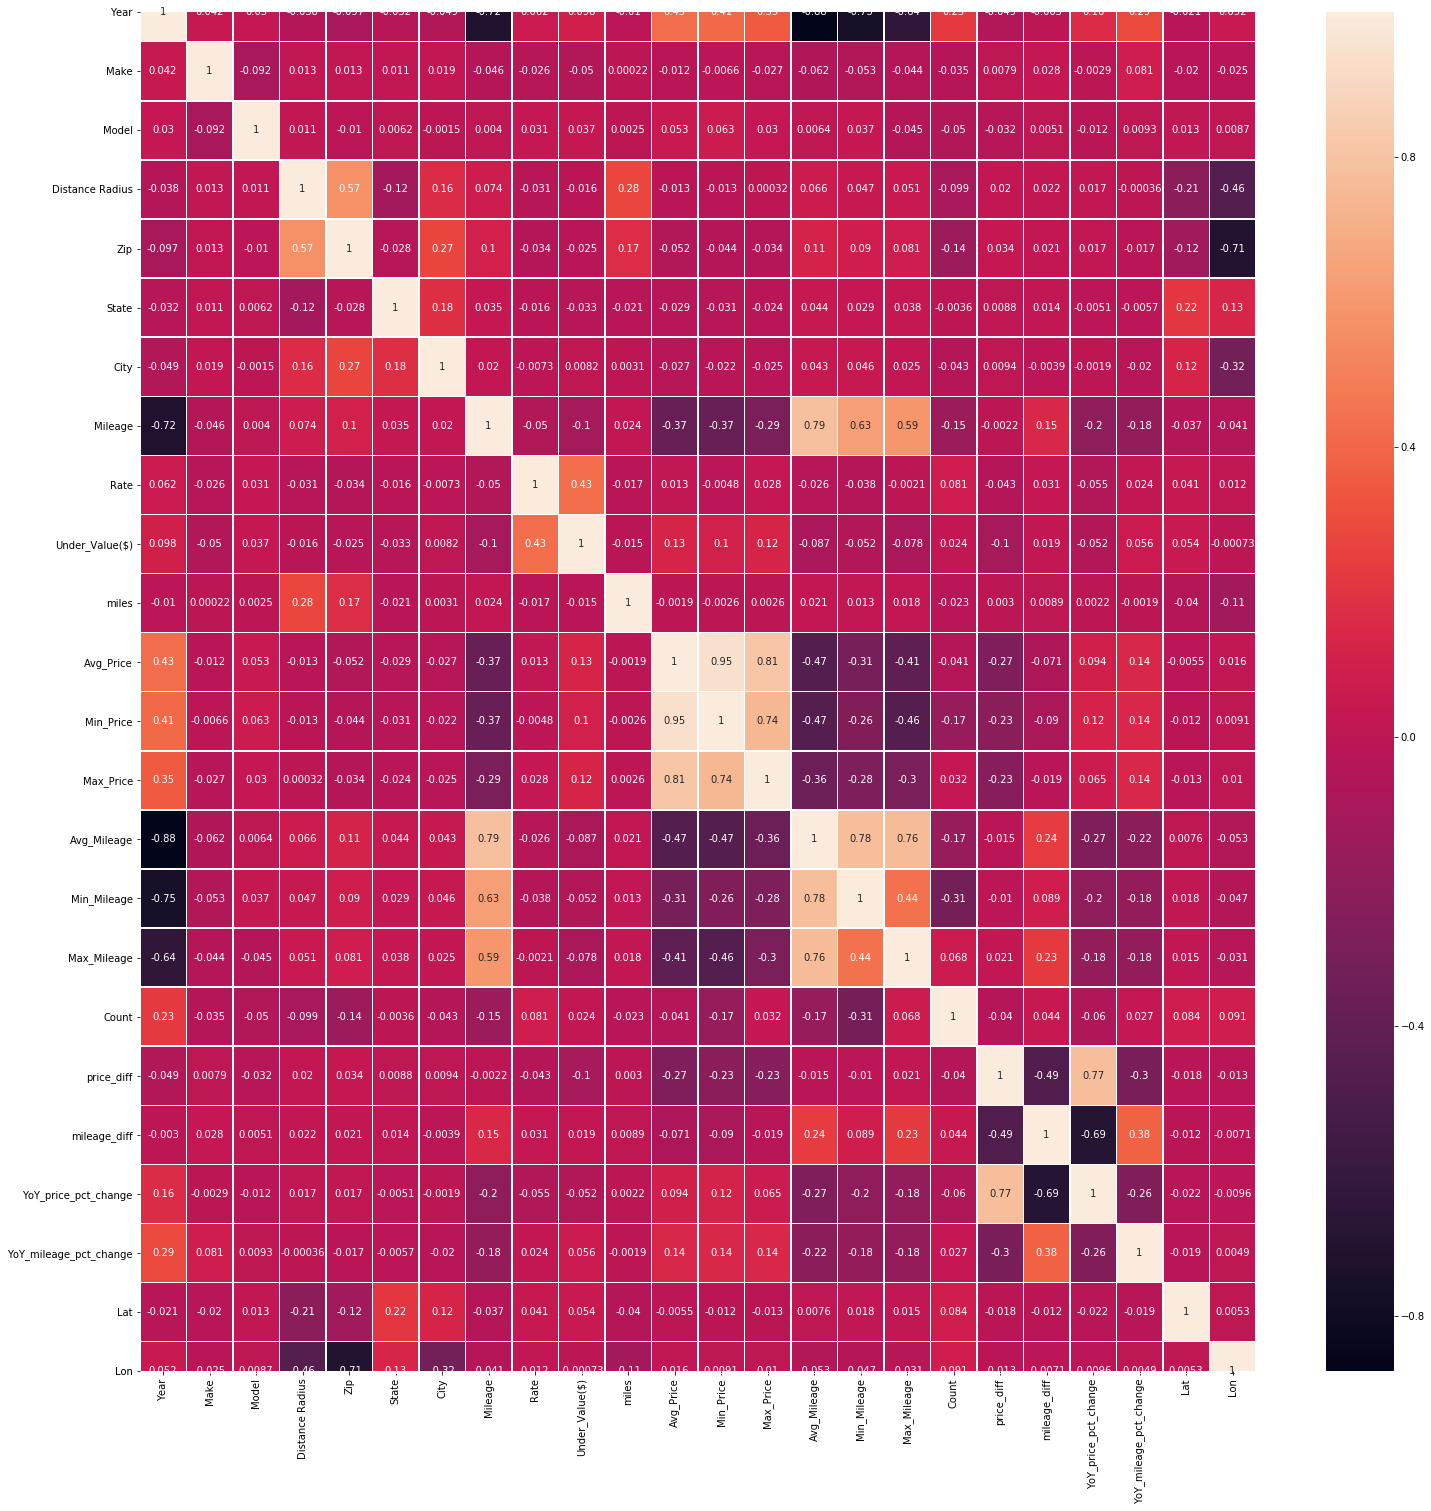

In [6]:
## Display the coorelation heatmap among all the features except for the price
fig, ax = plt.subplots(figsize=(25,25))
hm = sns.heatmap(X.corr(), annot = True, linewidths=0.5, ax=ax)
plt.show()

## Feature Selection

In [7]:
KB_CF = SelectKBest(f_classif, k=15)
KB_CF.fit(X, y)

SelectKBest(k=15, score_func=<function f_classif at 0x7f578df738c8>)

In [8]:
threshold = sorted(KB_CF.scores_, reverse=True)[KB_CF.k - 1]
    
col_names = []

for score, col in zip(KB_CF.scores_, feats):
    if score >= threshold:
        col_names.append(col)

col_names

['Year',
 'Model',
 'Zip',
 'Mileage',
 'Under_Value($)',
 'Avg_Price',
 'Min_Price',
 'Max_Price',
 'Avg_Mileage',
 'Min_Mileage',
 'Max_Mileage',
 'Count',
 'price_diff',
 'YoY_price_pct_change',
 'YoY_mileage_pct_change']

In [9]:
X_new = X[['Year',
 'Model',
 'Zip',
 'Mileage',
 'Under_Value($)',
 'Avg_Price',
 'Min_Price',
 'Max_Price',
 'Avg_Mileage',
 'Min_Mileage',
 'Max_Mileage',
 'Count',
 'price_diff',
 'YoY_price_pct_change',
 'YoY_mileage_pct_change']]
new_feats = X_new.columns
X_new.fillna(0)

,Year,Model,Zip,Mileage,Under_Value($),Avg_Price,Min_Price,Max_Price,Avg_Mileage,Min_Mileage,Max_Mileage,Count,price_diff,YoY_price_pct_change,YoY_mileage_pct_change
175347,2015,28,13,89691,0,14948.830986,7471,22913,89245.211268,1337,177241,142,-1456,-8,10
210122,2021,1111,11,11374,0,44855.711864,34000,51137,18764.683616,217,153687,177,-3633,-7,393
189523,2020,623,12,25663,0,22717.617466,8250,35734,39989.870849,7,132640,813,-2223,-8,84
371858,2018,2128,35,68686,0,49827.000000,1,67997,66169.420635,1766,152392,126,-10782,-17,46
172415,2021,2328,21,15581,0,86360.868421,76990,92495,14434.500000,8738,44387,38,-3243,-3,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377698,2011,2199,27,170999,207,11175.625000,7750,18650,135978.625000,96739,170999,8,925,9,-8
377702,2015,2212,27,89479,291,16566.444444,10700,21990,77243.166667,14380,128553,18,-1498,-8,22
377704,2015,2424,27,102812,252,34577.571429,25000,43387,119371.085714,61387,162712,35,-6319,-15,18
377711,2018,1494,27,21052,748,28008.588235,27990,28306,34988.941176,21052,35860,17,0,0,0


In [10]:
X_new.dtypes

Year                        int64
Model                       int16
Zip                          int8
Mileage                     int64
Under_Value($)              int64
Avg_Price                 float64
Min_Price                   int64
Max_Price                   int64
Avg_Mileage               float64
Min_Mileage                 int64
Max_Mileage                 int64
Count                       int64
price_diff                  int64
YoY_price_pct_change        int64
YoY_mileage_pct_change      int64
dtype: object

## Build Models

In [11]:
## Split the training and test data
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=25)

scaler=StandardScaler()

## Normalize the data using standardscale
X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [12]:
def train_ml_model(x,y,model_type):

    if model_type=='lr':

        model=LinearRegression()

    elif model_type=='gbr':

        model=GradientBoostingRegressor()

    elif model_type=='rf':

        model=RandomForestRegressor()

    model.fit(x,y)

    return model

model_lr=train_ml_model(X_train_scaled,y_train,'lr')

model_gbr=train_ml_model(X_train_scaled,y_train,'gbr')

model_rf=train_ml_model(X_train_scaled,y_train,'rf')

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


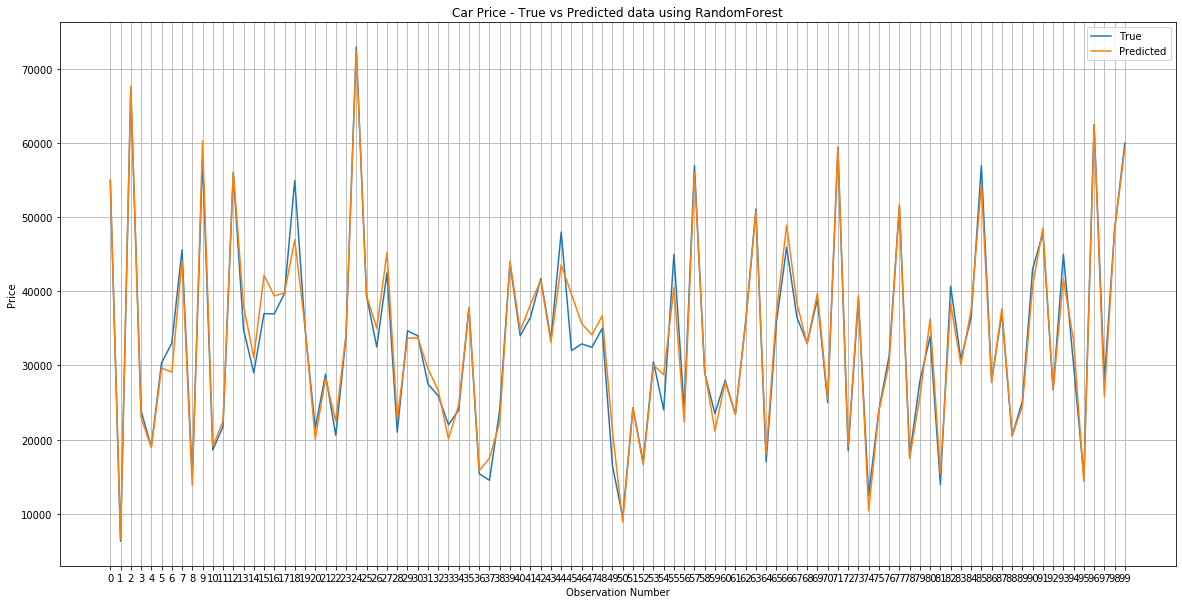

In [13]:
y_pred=model_rf.predict(X_test_scaled)
number_of_observations=100
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data using RandomForest")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

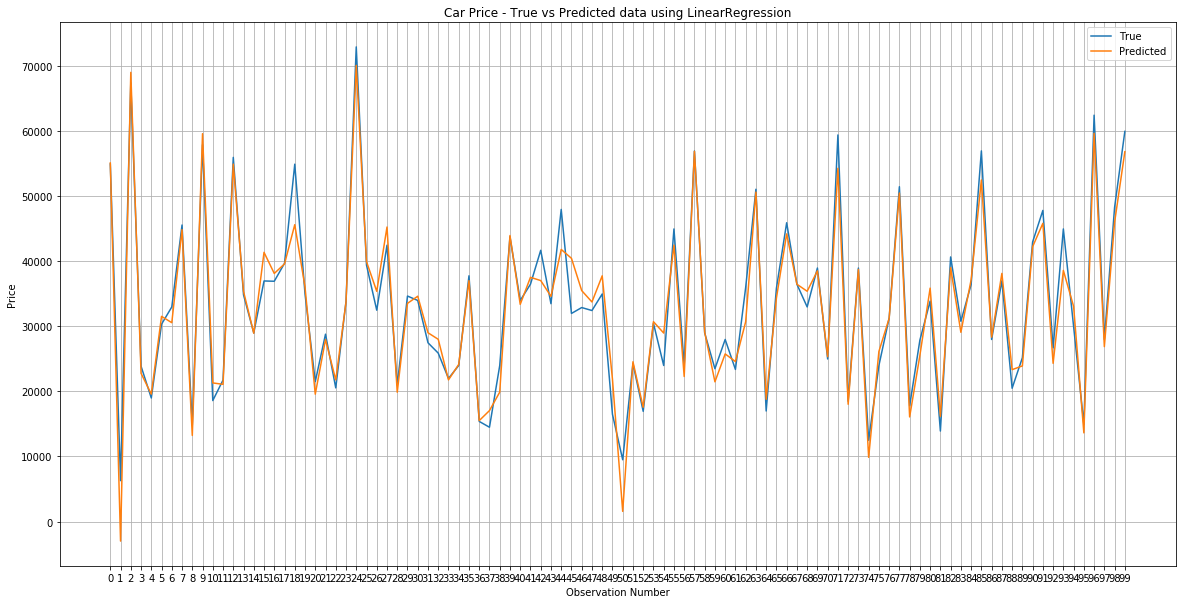

In [14]:
y_pred=model_lr.predict(X_test_scaled)
number_of_observations=100
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data using LinearRegression")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

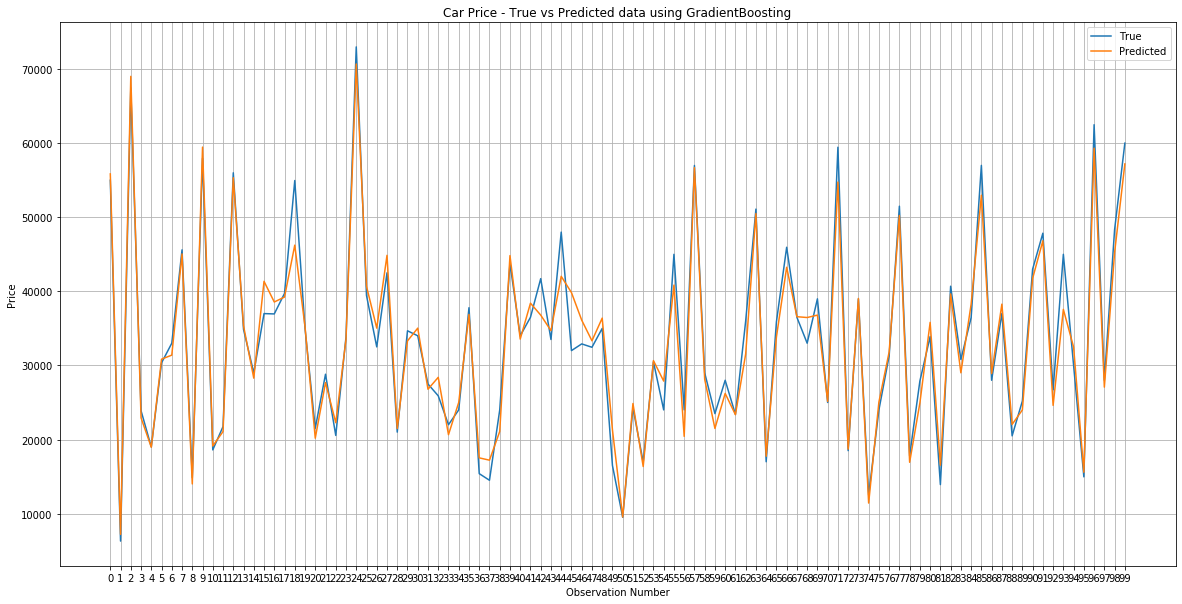

In [15]:
y_pred=model_gbr.predict(X_test_scaled)
number_of_observations=100
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data using GradientBoosting")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [17]:
def model_evaluate(model,x,y):

    predictions=model.predict(x)

    mse=mean_squared_error(y,predictions)

    mae=mean_absolute_error(y,predictions)

    mse=round(mse,2)

    mae=round(mae,2)

    return [mse,mae]

In [18]:
summary=PrettyTable(['Model','MSE','MAE'])

summary.add_row(['LR']+model_evaluate(model_lr,X_test_scaled,y_test))

summary.add_row(['GBR']+model_evaluate(model_gbr,X_test_scaled,y_test))

summary.add_row(['RF']+model_evaluate(model_rf,X_test_scaled,y_test))

print(summary)

+-------+------------+---------+
| Model |    MSE     |   MAE   |
+-------+------------+---------+
|   LR  | 9768400.28 | 2046.46 |
|  GBR  | 9084181.37 | 1968.33 |
|   RF  | 7299773.34 |  1606.8 |
+-------+------------+---------+


## Apply pretrained model for the whole dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377725 entries, 0 to 377724
Data columns (total 27 columns):
Year                      377725 non-null int64
Make                      377725 non-null object
Model                     377725 non-null object
Dealer_Name               377725 non-null object
Distance Radius           377725 non-null int64
Zip                       377725 non-null int64
State                     377725 non-null object
City                      377725 non-null object
Mileage                   377725 non-null int64
Price                     377725 non-null int64
Rate                      377725 non-null object
Under_Value($)            377725 non-null int64
miles                     377725 non-null int64
electronic_dealer         377725 non-null int64
Avg_Price                 377725 non-null float64
Min_Price                 377725 non-null int64
Max_Price                 377725 non-null int64
Avg_Mileage               377725 non-null float64
Min_Mileage    

In [20]:
df_for_predict = df.drop(columns=['Price', 'Dealer_Name', 'electronic_dealer'])
df_for_predict['Make']=df_for_predict['Make'].astype('category').cat.codes
df_for_predict['Model']=df_for_predict['Model'].astype('category').cat.codes
df_for_predict['Zip']=df_for_predict['Zip'].astype('category').cat.codes
df_for_predict['State']=df_for_predict['State'].astype('category').cat.codes
df_for_predict['City']=df_for_predict['City'].astype('category').cat.codes
df_for_predict['Rate']=df_for_predict['Rate'].astype('category').cat.codes

df_modify = df_for_predict[['Year',
                             'Model',
                             'Zip',
                             'Mileage',
                             'Under_Value($)',
                             'Avg_Price',
                             'Min_Price',
                             'Max_Price',
                             'Avg_Mileage',
                             'Min_Mileage',
                             'Max_Mileage',
                             'Count',
                             'price_diff',
                             'YoY_price_pct_change',
                             'YoY_mileage_pct_change']]

df_modify.fillna(0)
df_modify_scaled=scaler.fit_transform(df_modify)

predicted_value = model_rf.predict(df_modify_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
## Add two new features, predicted price and price difference between prediced price and actual price.
new_df = df
new_df['Predicted_price'] = predicted_value
new_df['Diff'] = new_df['Price'] - new_df['Predicted_price']

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377725 entries, 0 to 377724
Data columns (total 29 columns):
Year                      377725 non-null int64
Make                      377725 non-null object
Model                     377725 non-null object
Dealer_Name               377725 non-null object
Distance Radius           377725 non-null int64
Zip                       377725 non-null int64
State                     377725 non-null object
City                      377725 non-null object
Mileage                   377725 non-null int64
Price                     377725 non-null int64
Rate                      377725 non-null object
Under_Value($)            377725 non-null int64
miles                     377725 non-null int64
electronic_dealer         377725 non-null int64
Avg_Price                 377725 non-null float64
Min_Price                 377725 non-null int64
Max_Price                 377725 non-null int64
Avg_Mileage               377725 non-null float64
Min_Mileage    

In [23]:
new_df.head(20)

,Year,Make,Model,Dealer_Name,Distance Radius,Zip,State,City,Mileage,Price,...,Max_Mileage,Count,price_diff,mileage_diff,YoY_price_pct_change,YoY_mileage_pct_change,Lat,Lon,Predicted_price,Diff
0,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,68184,90,-4506,14484,-11,96,32.716,-117.161,36800.8,1189.2
1,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,68184,90,-4506,14484,-11,96,32.716,-117.161,36800.8,1189.2
2,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,68184,90,-4506,14484,-11,96,32.716,-117.161,38312.4,677.6
3,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,68184,90,-4506,14484,-11,96,32.716,-117.161,38312.4,677.6
4,2020,Jeep,Grand Cherokee Laredo,San Diego Chrysler Dodge Jeep RAM,50,92132,CA,San Diego,21909,31388,...,68184,90,-4506,14484,-11,96,32.716,-117.161,35792.7,-4404.7
5,2016,Dodge,Challenger SRT Hellcat,TRED Private Seller (San Diego),50,92132,CA,San Diego,29635,54099,...,71456,51,-2857,20301,-5,88,32.716,-117.161,56021.5,-1922.5
6,2016,Dodge,Challenger SRT Hellcat,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,62595,50990,...,71456,51,-2857,20301,-5,88,32.716,-117.161,51785.3,-795.3
7,2010,Lexus,ES 350,TRED Private Seller (San Diego),50,92132,CA,San Diego,159000,8909,...,216862,55,-9271,23697,-35,44,32.716,-117.161,12902.5,-3993.5
8,2010,Lexus,ES 350,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,64663,18990,...,216862,55,-9271,23697,-35,44,32.716,-117.161,18180.5,809.5
9,2020,Buick,Encore Essence,Hertz Car Sales San Diego,50,92132,CA,San Diego,57751,21353,...,70829,96,0,0,0,0,32.716,-117.161,24704.3,-3351.3


In [24]:
## Save new data to the team folder
new_df.to_pickle('/dsa/groups/casestudy2022su/team05/data_with_prediction.pkl')